In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [57]:
# Load the data from CSV files
data1 = pd.read_csv('loblaws.csv')
data2 = pd.read_csv('loblaws1.csv')

# Merge the data if needed (assuming they need to be concatenated)
data = pd.concat([data1, data2], ignore_index=True)

# Display the first few rows of the dataset
data.head()


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Data,Variable,Discerption
0,50001.0,1.0,4.0,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,...,9.0,1.0,11.0,1.0,1.0,5.0,160.0,NaN,NaN,NaN
1,50002.0,1.0,NaN,Phone,1.0,8.0,UPI,Male,3.0,4.0,...,7.0,1.0,15.0,0.0,1.0,0.0,121.0,NaN,NaN,NaN
2,50003.0,1.0,NaN,Phone,1.0,30.0,Debit Card,Male,2.0,4.0,...,6.0,1.0,14.0,0.0,1.0,3.0,120.0,NaN,NaN,NaN
3,50004.0,1.0,0.0,Phone,3.0,15.0,Debit Card,Male,2.0,4.0,...,8.0,0.0,23.0,0.0,1.0,3.0,134.0,NaN,NaN,NaN
4,50005.0,1.0,0.0,Phone,1.0,12.0,CC,Male,NaN,3.0,...,3.0,0.0,11.0,1.0,1.0,3.0,130.0,NaN,NaN,NaN


In [58]:
#data = data.drop(columns=['Data', 'Variable', 'Discerption'])

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5650 entries, 0 to 5649
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   float64
 1   Churn                        5630 non-null   float64
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   float64
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   float64
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   float64
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [60]:
# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)


Missing Values:
CustomerID                       20
Churn                            20
Tenure                          284
PreferredLoginDevice             20
CityTier                         20
WarehouseToHome                 271
PreferredPaymentMode             20
Gender                           20
HourSpendOnApp                  275
NumberOfDeviceRegistered         20
PreferedOrderCat                 20
SatisfactionScore                20
MaritalStatus                    20
NumberOfAddress                  20
Complain                         20
OrderAmountHikeFromlastYear     285
CouponUsed                      276
OrderCount                      278
DaySinceLastOrder               327
CashbackAmount                   20
Data                           5630
Variable                       5630
Discerption                    5630
dtype: int64


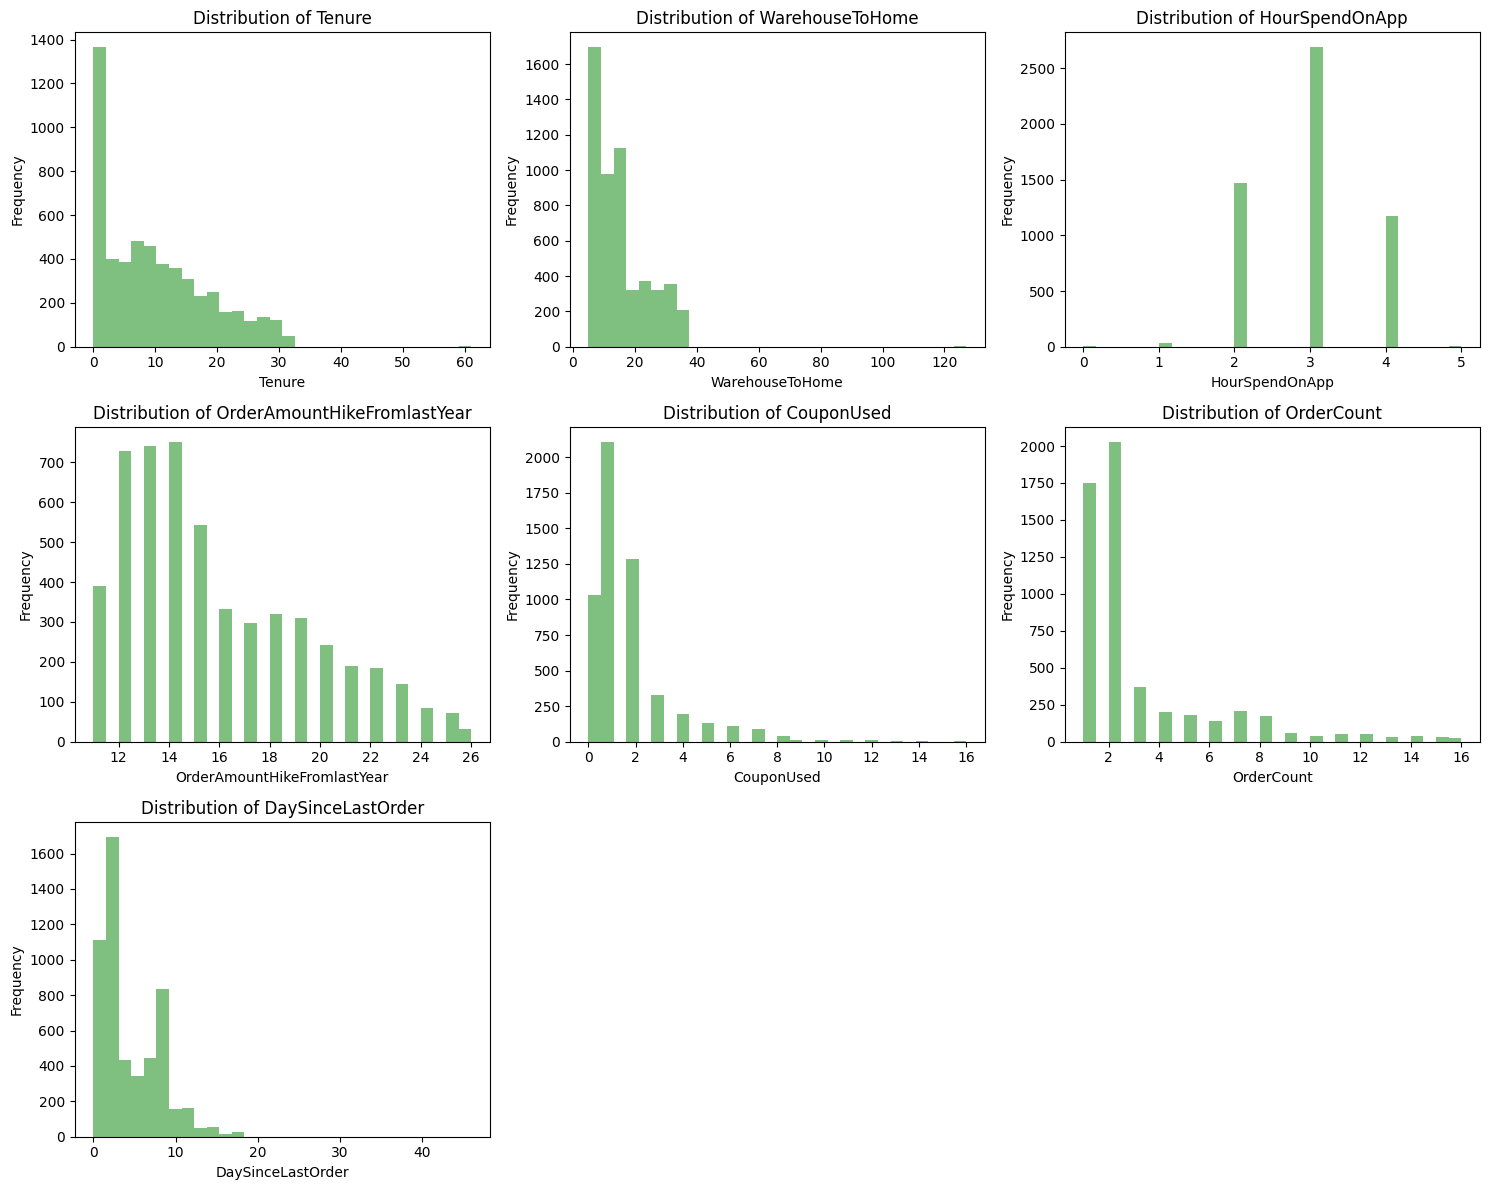

In [61]:
columns_to_plot = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                   'OrderAmountHikeFromlastYear', 'CouponUsed', 
                   'OrderCount', 'DaySinceLastOrder']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    data[column].plot(kind='hist', bins=30, alpha=0.5, color='green', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Hide empty subplots
for j in range(i + 1, 9):
    row = j // 3
    col = j % 3
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()

In [62]:
# imputer for missing values in hour spend on app
data['HourSpendOnApp'].fillna(data['HourSpendOnApp'].mean(), inplace=True)

In [63]:
# Impute missing values with median for the following columns
columns_to_impute = ['Tenure', 'WarehouseToHome', 
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 
                     'OrderCount', 'DaySinceLastOrder']

for column in columns_to_impute:
    data[column].fillna(data[column].median(), inplace=True)

In [64]:
# Iterate over columns and print unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f'Unique values of {column}: {unique_values}')

Unique values of CustomerID: [50001. 50002. 50003. ... 55629. 55630.    nan]
Unique values of Churn: [ 1.  0. nan]
Unique values of Tenure: [ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]
Unique values of PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer' nan]
Unique values of CityTier: [ 3.  1.  2. nan]
Unique values of WarehouseToHome: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]
Unique values of PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card'
 nan]
Unique values of Gender: ['Female' 'Male' nan]
Unique values of HourSpendOnApp: [3.         2.         2.93153488 1.         0.         4.
 5.        ]
Unique values of NumberOfDeviceRegistered: [ 3.  4.  5.  2.  1.  6. nan]
Unique values of PreferedOrderCat: [

In [65]:
columns_to_round = ['OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 
                    'DaySinceLastOrder', 'Tenure', 'HourSpendOnApp', 'WarehouseToHome']

for column in columns_to_round:
    data[column] = data[column].round().astype(int)

In [66]:
# Iterate over columns and print unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f'Unique values of {column}: {unique_values}')

Unique values of CustomerID: [50001. 50002. 50003. ... 55629. 55630.    nan]
Unique values of Churn: [ 1.  0. nan]
Unique values of Tenure: [ 4  9  0 13 11 19 20 14  8 18  5  2 30  1 23  3 29  6 26 28  7 24 25 10
 15 22 27 16 12 21 17 50 60 31 51 61]
Unique values of PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer' nan]
Unique values of CityTier: [ 3.  1.  2. nan]
Unique values of WarehouseToHome: [  6   8  30  15  12  22  11   9  31  18  13  20  29  28  26  14  10  27
  17  23  33  19  35  24  16  25  32  34   5  21 126   7  36 127]
Unique values of PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card'
 nan]
Unique values of Gender: ['Female' 'Male' nan]
Unique values of HourSpendOnApp: [3 2 1 0 4 5]
Unique values of NumberOfDeviceRegistered: [ 3.  4.  5.  2.  1.  6. nan]
Unique values of PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'
 nan]
Unique values of SatisfactionScore: [ 2.  3.  5. 

In [67]:
unique_values_PreferredPaymentMode = data['PreferredPaymentMode'].unique()
print(f'Unique values of PreferredPaymentMode: {unique_values_PreferredPaymentMode}')

unique_values_PreferredLoginDevice = data['PreferredLoginDevice'].unique()
print(f'Unique values of PreferredLoginDevice: {unique_values_PreferredLoginDevice}')

unique_values_MaritalStatus = data['MaritalStatus'].unique()
print(f'Unique values of MaritalStatus: {unique_values_MaritalStatus}')

unique_values_PreferedOrderCat = data['PreferedOrderCat'].unique()
print(f'Unique values of PreferedOrderCategory: {unique_values_PreferedOrderCat}')

Unique values of PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card'
 nan]
Unique values of PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer' nan]
Unique values of MaritalStatus: ['Single' 'Divorced' 'Married' nan]
Unique values of PreferedOrderCategory: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'
 nan]


In [68]:
data = data.drop(['CustomerID'], axis=1)
data.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Data', 'Variable',
       'Discerption'],
      dtype='object')

In [69]:
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace('Mobile Phone', 'Phone')
unique_values_PreferredLoginDevice = data['PreferredLoginDevice'].unique()
print(f'Unique values of PreferredLoginDevice: {unique_values_PreferredLoginDevice}')

data['PreferredLoginDevice'] = data['PreferredLoginDevice'].map({'Phone': 0, 'Computer': 1})
data['MaritalStatus'] = data['MaritalStatus'].map({'Single': 0, 'Divorced': 1, 'Married': 2})
data['Gender'], mapping = data['Gender'].factorize()
print(mapping)

data['PreferedOrderCat'] = data['PreferedOrderCat'].replace('Mobile Phone', 'Mobile')
unique_values_PreferedOrderCat = data['PreferedOrderCat'].unique()
print(f'Unique values of PreferedOrderCategory: {unique_values_PreferedOrderCat}')

data['PreferedOrderCat'], mapping = data['PreferedOrderCat'].factorize()
print(mapping)

# Combine 'COD' and 'Cash on Delivery'
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')

# Combine 'CC' and 'Credit Card'
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace('CC', 'Credit Card')
unique_values_PreferredPaymentMode = data['PreferredPaymentMode'].unique()
print(f'Unique values of PreferredPaymentMode: {unique_values_PreferredPaymentMode}')

encoded_payment_mode, mapping = data['PreferredPaymentMode'].factorize()


print("\nMapping of Encoded Values to Original Categories:")
print(mapping)

data['PreferredPaymentMode'], mapping = data['PreferredPaymentMode'].factorize()
print(mapping)

Unique values of PreferredLoginDevice: ['Phone' 'Computer' nan]
Index(['Female', 'Male'], dtype='object')
Unique values of PreferedOrderCategory: ['Laptop & Accessory' 'Mobile' 'Others' 'Fashion' 'Grocery' nan]
Index(['Laptop & Accessory', 'Mobile', 'Others', 'Fashion', 'Grocery'], dtype='object')
Unique values of PreferredPaymentMode: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]

Mapping of Encoded Values to Original Categories:
Index(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'], dtype='object')
Index(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'], dtype='object')


In [70]:
unique_values_PreferredPaymentMode = data['PreferredPaymentMode'].unique()
print(f'Unique values of PreferredPaymentMode: {unique_values_PreferredPaymentMode}')

unique_values_PreferredLoginDevice = data['PreferredLoginDevice'].unique()
print(f'Unique values of PreferredLoginDevice: {unique_values_PreferredLoginDevice}')

unique_values_MaritalStatus = data['MaritalStatus'].unique()
print(f'Unique values of MaritalStatus: {unique_values_MaritalStatus}')

unique_values_PreferedOrderCat = data['PreferedOrderCat'].unique()
print(f'Unique values of PreferedOrderCategory: {unique_values_PreferedOrderCat}')

Unique values of PreferredPaymentMode: [ 0  1  2  3  4 -1]
Unique values of PreferredLoginDevice: [ 0.  1. nan]
Unique values of MaritalStatus: [ 0.  1.  2. nan]
Unique values of PreferedOrderCategory: [ 0  1  2  3  4 -1]


In [71]:
data.head(15)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Data,Variable,Discerption
0,1.0,4,0.0,3.0,6,0,0,3,3.0,0,...,9.0,1.0,11,1,1,5,160.0,NaN,NaN,NaN
1,1.0,9,0.0,1.0,8,1,1,3,4.0,1,...,7.0,1.0,15,0,1,0,121.0,NaN,NaN,NaN
2,1.0,9,0.0,1.0,30,0,1,2,4.0,1,...,6.0,1.0,14,0,1,3,120.0,NaN,NaN,NaN
3,1.0,0,0.0,3.0,15,0,1,2,4.0,0,...,8.0,0.0,23,0,1,3,134.0,NaN,NaN,NaN
4,1.0,0,0.0,1.0,12,2,1,3,3.0,1,...,3.0,0.0,11,1,1,3,130.0,NaN,NaN,NaN
5,1.0,0,1.0,1.0,22,0,0,3,5.0,1,...,2.0,1.0,22,4,6,7,139.0,NaN,NaN,NaN
6,1.0,9,0.0,3.0,11,3,1,2,3.0,0,...,4.0,0.0,14,0,1,0,121.0,NaN,NaN,NaN
7,1.0,9,0.0,1.0,6,2,1,3,3.0,1,...,3.0,1.0,16,2,2,0,123.0,NaN,NaN,NaN
8,1.0,13,0.0,3.0,9,4,1,3,4.0,1,...,2.0,1.0,14,0,1,2,127.0,NaN,NaN,NaN
9,1.0,9,0.0,1.0,31,0,1,2,5.0,1,...,2.0,0.0,12,1,1,1,123.0,NaN,NaN,NaN


In [72]:
data.describe()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5650.000000,5630.000000,5630.000000,5650.000000,5650.000000,5650.000000,5650.000000,5630.000000,5650.000000,5630.000000,5630.000000,5630.000000,5630.000000,5650.000000,5650.000000,5650.000000,5650.000000,5630.000000
mean,0.168384,10.130088,0.290231,1.654707,15.561239,1.405310,0.595398,2.934867,3.688988,1.186903,3.066785,1.211368,4.214032,0.284902,15.672212,1.714336,2.958407,4.454159,177.221492
std,0.374240,8.343415,0.453909,0.915389,8.331694,1.384091,0.498019,0.704289,1.023999,1.275519,1.380194,0.897132,2.583586,0.451408,3.584919,1.854837,2.874714,3.565353,49.193869
min,0.000000,0.000000,0.000000,1.000000,5.000000,-1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,9.000000,0.000000,0.000000,2.000000,3.000000,0.000000,2.000000,0.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,9.000000,0.000000,1.000000,14.000000,2.000000,1.000000,3.000000,4.000000,1.000000,3.000000,2.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,0.000000,15.000000,1.000000,3.000000,20.000000,2.000000,1.000000,3.000000,4.000000,2.000000,4.000000,2.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,1.000000,61.000000,1.000000,3.000000,127.000000,4.000000,1.000000,5.000000,6.000000,4.000000,5.000000,2.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


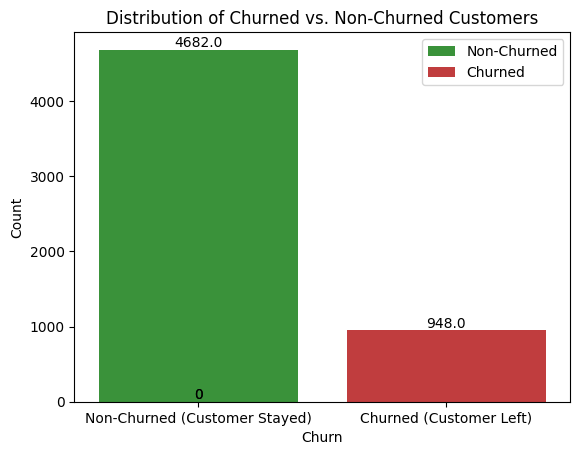

In [73]:
custom_colors = sns.color_palette(['#2ca02c', '#d62728'])  # Green for non-churned, red for churned

# Plotting the distribution of churned vs. non-churned customers
ax = sns.countplot(x='Churn', hue='Churn', data=data, palette=custom_colors)

# Calculate counts for each category
counts = data['Churn'].value_counts()

# Annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha='center', va='bottom')

plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Churned (Customer Stayed)', 'Churned (Customer Left)'], rotation=0)
plt.legend(['Non-Churned', 'Churned'])  # Adding legend manually
plt.show()

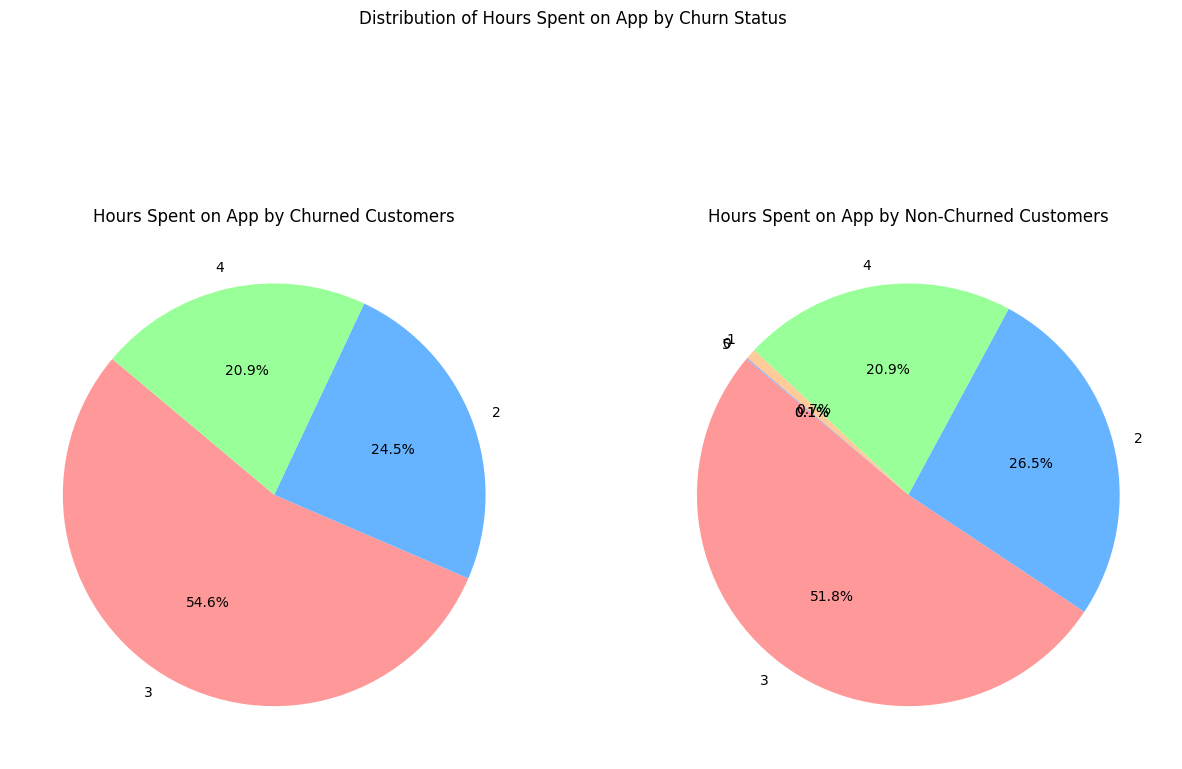

In [74]:
# Filter data for churned and non-churned customers
churned_data = data[data['Churn'] == 1]
non_churned_data = data[data['Churn'] == 0]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Custom color palette
custom_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Pie chart for HourSpendOnApp of churned customers
churned_hours_counts = churned_data['HourSpendOnApp'].value_counts()
axes[0].pie(churned_hours_counts, labels=churned_hours_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
axes[0].set_title('Hours Spent on App by Churned Customers')

# Pie chart for HourSpendOnApp of non-churned customers
non_churned_hours_counts = non_churned_data['HourSpendOnApp'].value_counts()
axes[1].pie(non_churned_hours_counts, labels=non_churned_hours_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
axes[1].set_title('Hours Spent on App by Non-Churned Customers')

# Overall title
plt.suptitle('Distribution of Hours Spent on App by Churn Status')

plt.show()

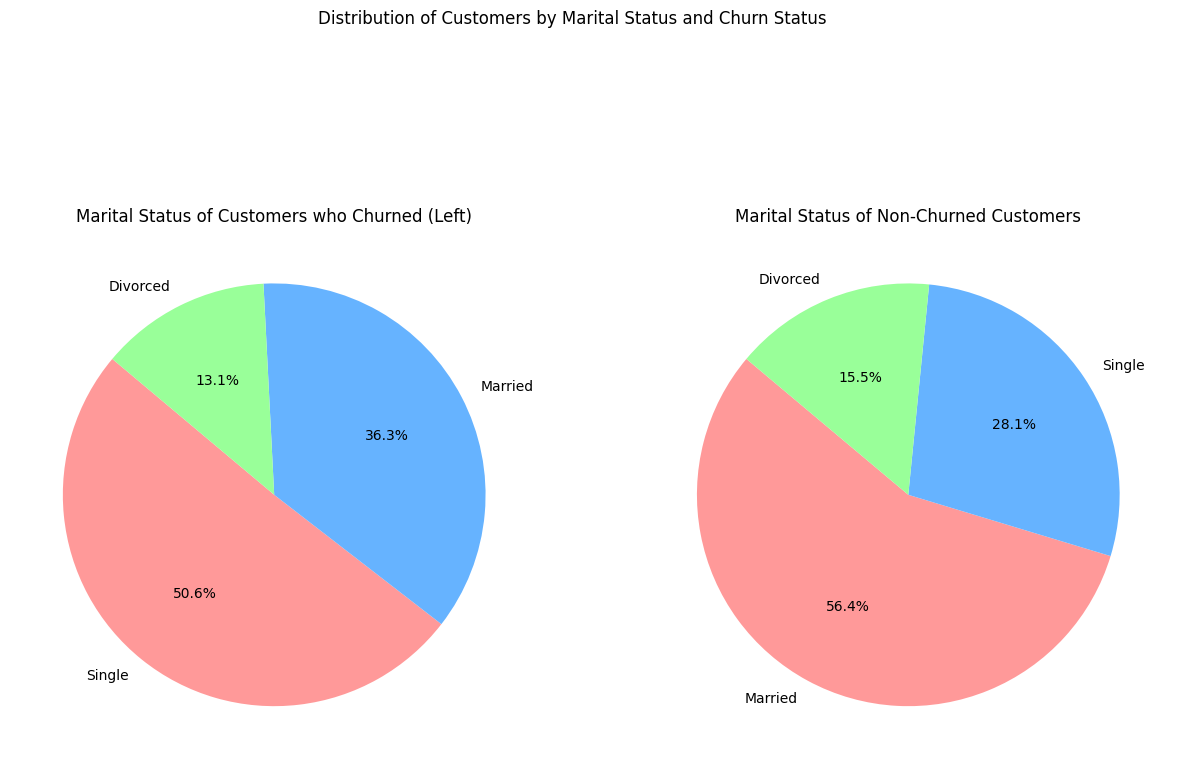

In [75]:
marital_status_mapping = {
    0: 'Single', 
    1: 'Divorced', 
    2: 'Married'
}

# Map the numerical values to marital status names
data['MaritalStatus'] = data['MaritalStatus'].map(marital_status_mapping)

# Filter data for churned and non-churned customers
churned_data = data[data['Churn'] == 1]
non_churned_data = data[data['Churn'] == 0]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Custom color palette
custom_colors = ['#ff9999','#66b3ff','#99ff99']

# Pie chart for churned customers
churned_counts = churned_data['MaritalStatus'].value_counts()
axes[0].pie(churned_counts, labels=churned_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
axes[0].set_title('Marital Status of Customers who Churned (Left)')

# Pie chart for non-churned customers
non_churned_counts = non_churned_data['MaritalStatus'].value_counts()
axes[1].pie(non_churned_counts, labels=non_churned_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
axes[1].set_title('Marital Status of Non-Churned Customers')

# Overall title
plt.suptitle('Distribution of Customers by Marital Status and Churn Status')

plt.show()

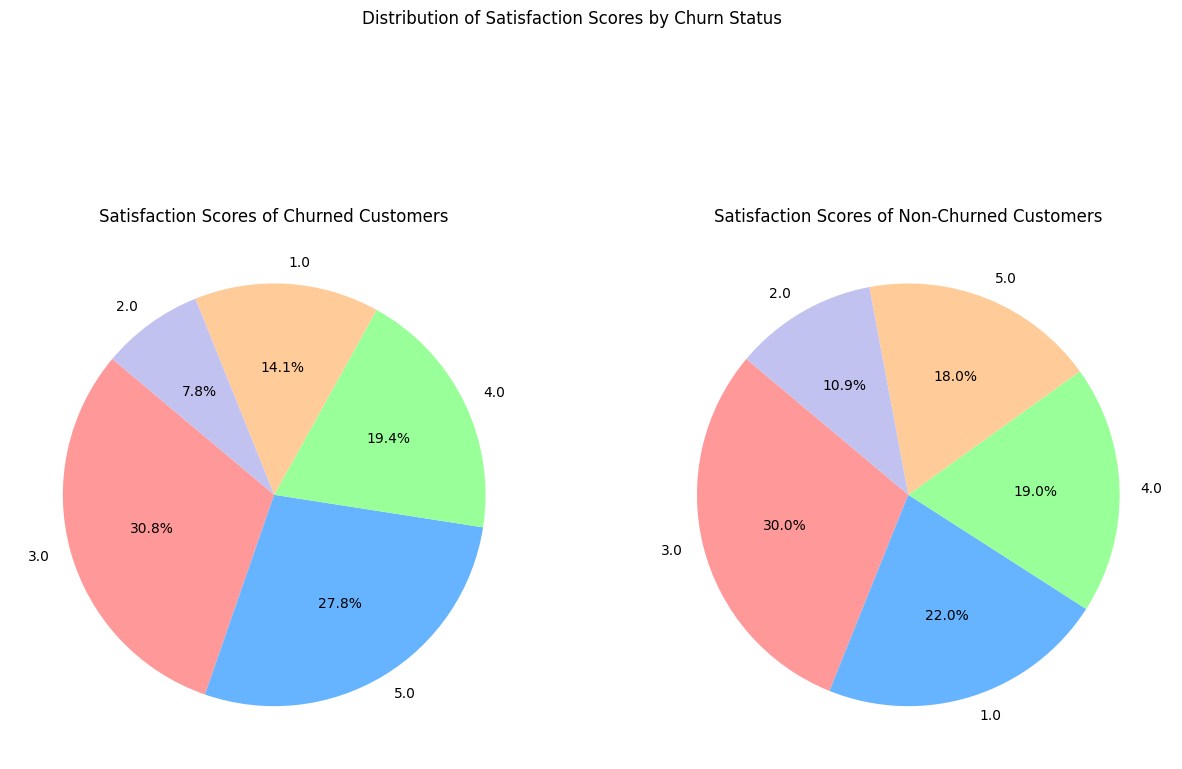

In [76]:
# Filter data for churned and non-churned customers
churned_data = data[data['Churn'] == 1]
non_churned_data = data[data['Churn'] == 0]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Custom color palette
custom_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

# Pie chart for satisfaction scores of churned customers
churned_satisfaction_counts = churned_data['SatisfactionScore'].value_counts()
axes[0].pie(churned_satisfaction_counts, labels=churned_satisfaction_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
axes[0].set_title('Satisfaction Scores of Churned Customers')

# Pie chart for satisfaction scores of non-churned customers
non_churned_satisfaction_counts = non_churned_data['SatisfactionScore'].value_counts()
axes[1].pie(non_churned_satisfaction_counts, labels=non_churned_satisfaction_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
axes[1].set_title('Satisfaction Scores of Non-Churned Customers')

# Overall title
plt.suptitle('Distribution of Satisfaction Scores by Churn Status')

plt.show()

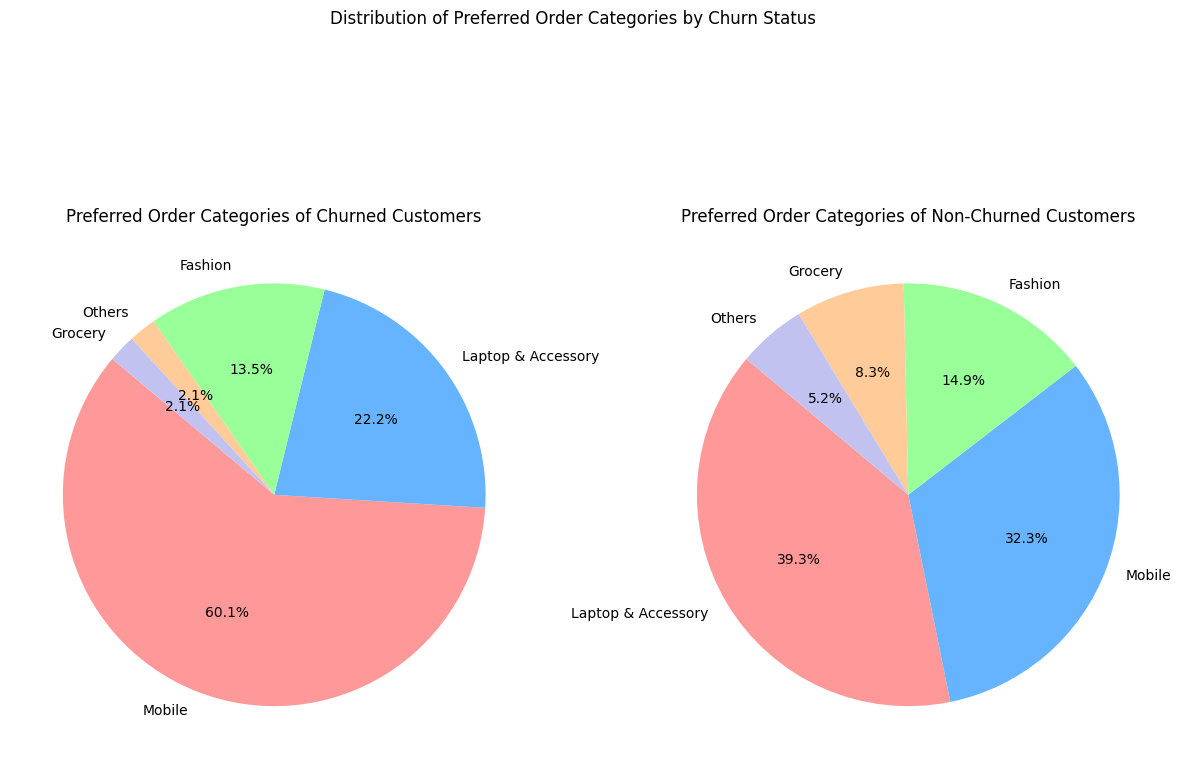

In [77]:
# Define mapping of numerical values to category names
category_mapping = {
    0: 'Laptop & Accessory',
    1: 'Mobile',
    2: 'Others',
    3: 'Fashion',
    4: 'Grocery'
}

# Map numerical values to category names in the DataFrame
data['PreferedOrderCat'] = data['PreferedOrderCat'].map(category_mapping)

# Filter data for churned and non-churned customers
churned_data = data[data['Churn'] == 1]
non_churned_data = data[data['Churn'] == 0]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Custom color palette
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Pie chart for preferred order categories of churned customers
churned_order_cat_counts = churned_data['PreferedOrderCat'].value_counts()
axes[0].pie(churned_order_cat_counts, labels=churned_order_cat_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
axes[0].set_title('Preferred Order Categories of Churned Customers')

# Pie chart for preferred order categories of non-churned customers
non_churned_order_cat_counts = non_churned_data['PreferedOrderCat'].value_counts()
axes[1].pie(non_churned_order_cat_counts, labels=non_churned_order_cat_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
axes[1].set_title('Preferred Order Categories of Non-Churned Customers')

# Overall title
plt.suptitle('Distribution of Preferred Order Categories by Churn Status')

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1740\3184375047.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tenure', data=churned_data, palette='viridis')


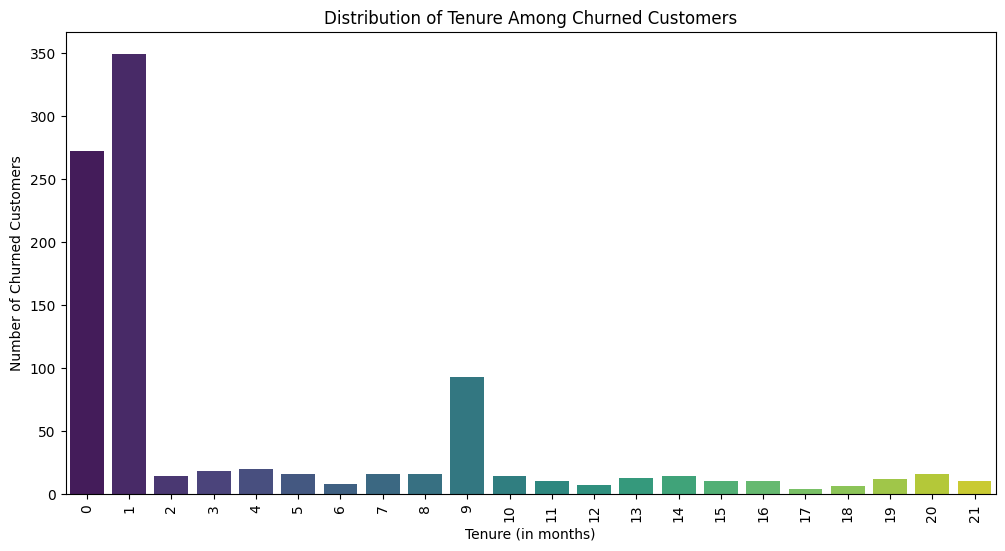

In [78]:
# Filter data for churned customers
churned_data = data[data['Churn'] == 1]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a bar plot for the tenure of churned customers with custom colors
sns.countplot(x='Tenure', data=churned_data, palette='viridis')
plt.title('Distribution of Tenure Among Churned Customers')
plt.xlabel('Tenure (in months)')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=90)  # Rotates X-axis labels for better readability

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1740\1310456049.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tenure', data=non_churned_data, palette=custom_colors)


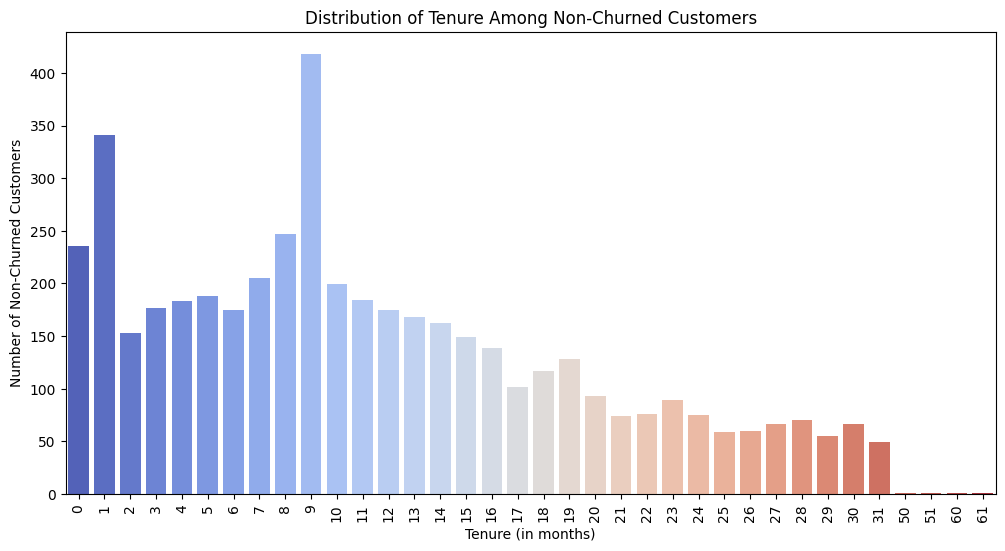

In [79]:
# Filter data for non-churned customers
non_churned_data = data[data['Churn'] == 0]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Custom color palette
custom_colors = sns.color_palette("coolwarm", n_colors=len(non_churned_data['Tenure'].unique()))

# Create a bar plot for the tenure of non-churned customers with custom colors
sns.countplot(x='Tenure', data=non_churned_data, palette=custom_colors)
plt.title('Distribution of Tenure Among Non-Churned Customers')
plt.xlabel('Tenure (in months)')
plt.ylabel('Number of Non-Churned Customers')
plt.xticks(rotation=90)  # Rotates X-axis labels for better readability

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1740\3173134643.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(x='PreferredLoginDevice', hue='PreferredLoginDevice', data=data, palette=colors)


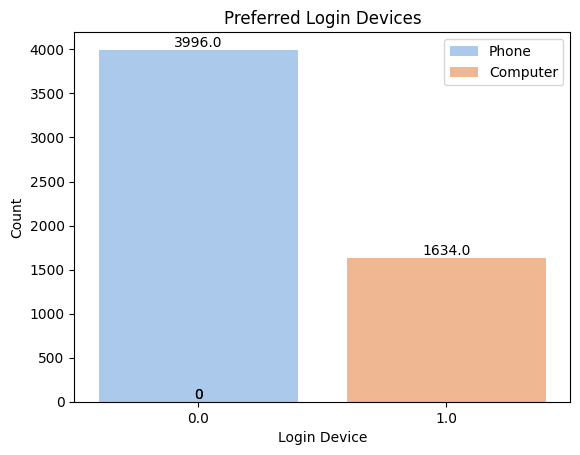

In [80]:
colors = sns.color_palette('pastel')

# Plotting the distribution of preferred login devices
ax = sns.countplot(x='PreferredLoginDevice', hue='PreferredLoginDevice', data=data, palette=colors)

# Calculate counts for each category
counts = data['PreferredLoginDevice'].value_counts()

# Annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha='center', va='bottom')

plt.title('Preferred Login Devices')
plt.xlabel('Login Device')
plt.ylabel('Count')
plt.legend(['Phone', 'Computer'])  # Adding legend manually
plt.show()

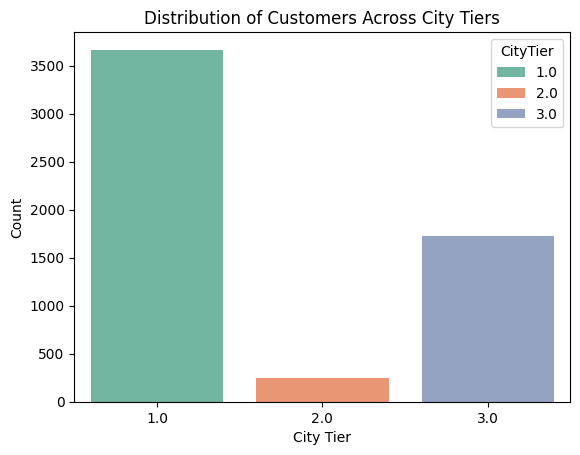

In [81]:
# Define a custom color palette
custom_palette = ['#66c2a5', '#fc8d62', '#8da0cb']  # Example colors

# Plotting the distribution of customers across city tiers
sns.countplot(x='CityTier', hue='CityTier', data=data, palette=custom_palette)
plt.title('Distribution of Customers Across City Tiers')
plt.xlabel('City Tier')
plt.ylabel('Count')

plt.show()

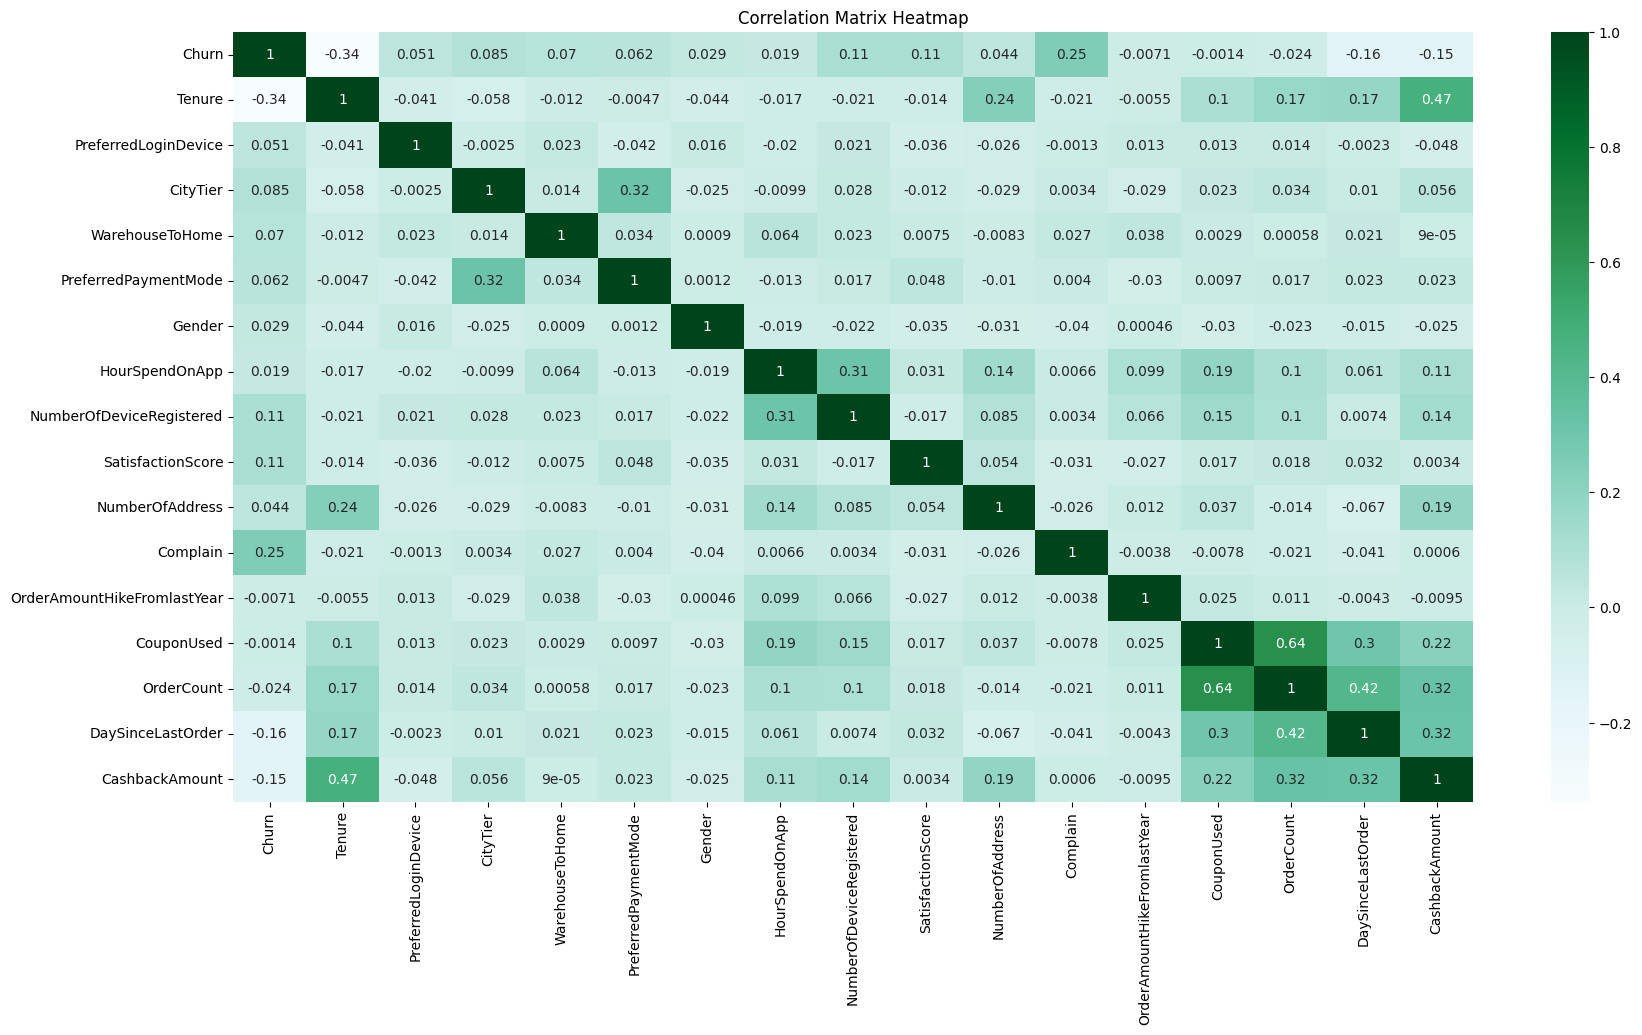

In [82]:
# Remove non-numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the heatmap with a different color palette ('BuGn')
sns.heatmap(corr_matrix, annot=True, cmap='BuGn')
plt.title('Correlation Matrix Heatmap')
plt.show()

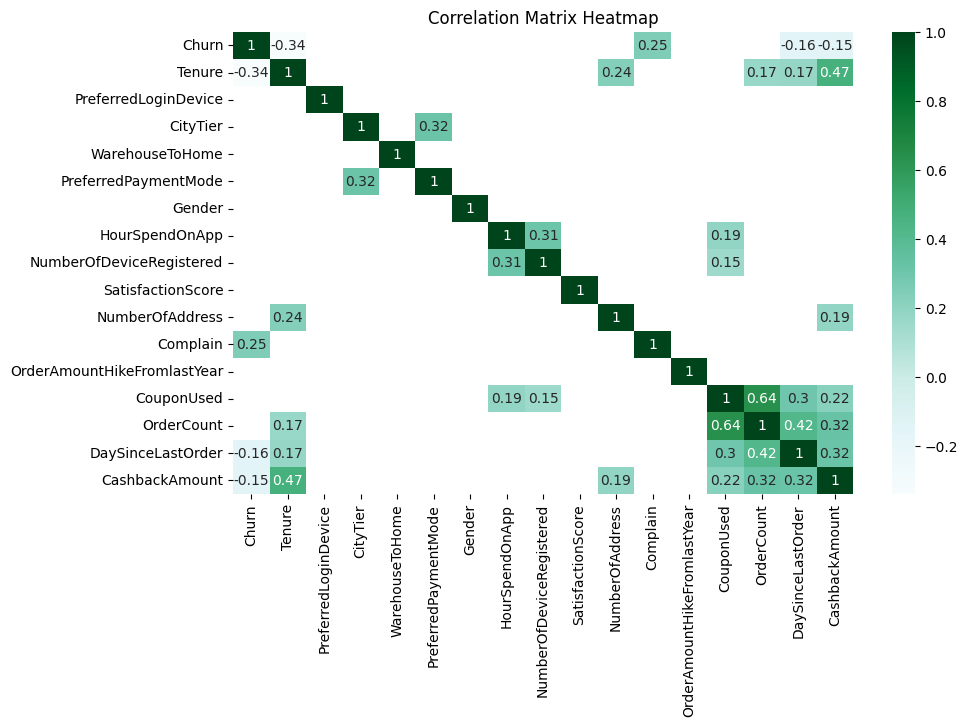

In [83]:
# Set the threshold value for correlation
threshold = 0.15

# Create a boolean mask of correlations greater than the threshold
above_threshold_mask = abs(corr_matrix) > threshold

# Plot the heatmap for correlations above the threshold
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[above_threshold_mask], annot=True, cmap='BuGn')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [84]:
object_columns = data.select_dtypes(include=['object']).columns
label_encoders={}
for col in object_columns:
    label_encoders[col]=LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

data.head(10)


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Data,Variable,Discerption
0,1.0,4,0.0,3.0,6,0,0,3,3.0,2,...,9.0,1.0,11,1,1,5,160.0,1,20,20
1,1.0,9,0.0,1.0,8,1,1,3,4.0,3,...,7.0,1.0,15,0,1,0,121.0,1,20,20
2,1.0,9,0.0,1.0,30,0,1,2,4.0,3,...,6.0,1.0,14,0,1,3,120.0,1,20,20
3,1.0,0,0.0,3.0,15,0,1,2,4.0,2,...,8.0,0.0,23,0,1,3,134.0,1,20,20
4,1.0,0,0.0,1.0,12,2,1,3,3.0,3,...,3.0,0.0,11,1,1,3,130.0,1,20,20
5,1.0,0,1.0,1.0,22,0,0,3,5.0,3,...,2.0,1.0,22,4,6,7,139.0,1,20,20
6,1.0,9,0.0,3.0,11,3,1,2,3.0,2,...,4.0,0.0,14,0,1,0,121.0,1,20,20
7,1.0,9,0.0,1.0,6,2,1,3,3.0,3,...,3.0,1.0,16,2,2,0,123.0,1,20,20
8,1.0,13,0.0,3.0,9,4,1,3,4.0,3,...,2.0,1.0,14,0,1,2,127.0,1,20,20
9,1.0,9,0.0,1.0,31,0,1,2,5.0,3,...,2.0,0.0,12,1,1,1,123.0,1,20,20


In [85]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Check for NaN values in the entire DataFrame
nan_values = data.isna().sum().sum()

if nan_values > 0:
    print("DataFrame contains NaN values.")
else:
    print("DataFrame does not contain any NaN values.")

# You can also check NaN values column-wise
nan_columns = data.columns[data.isna().any()].tolist()
if len(nan_columns) > 0:
    print("NaN values found in columns:", nan_columns)
else:
    print("No columns contain NaN values.")

DataFrame contains NaN values.
NaN values found in columns: ['Churn', 'PreferredLoginDevice', 'CityTier', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'CashbackAmount']


In [86]:
data = data.dropna(subset=['PreferredLoginDevice'])
columns_to_clean = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
for col in columns_to_clean:
    data.dropna(subset=[col], inplace=True)

In [87]:
if nan_values > 0:
    print("DataFrame contains NaN values.")
else:
    print("DataFrame does not contain any NaN values.")

# You can also check NaN values column-wise
nan_columns = data.columns[data.isna().any()].tolist()
if len(nan_columns) > 0:
    print("NaN values found in columns:", nan_columns)
else:
    print("No columns contain NaN values.")

DataFrame contains NaN values.
No columns contain NaN values.


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5630 entries, 0 to 5629
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   float64
 1   Tenure                       5630 non-null   int32  
 2   PreferredLoginDevice         5630 non-null   float64
 3   CityTier                     5630 non-null   float64
 4   WarehouseToHome              5630 non-null   int32  
 5   PreferredPaymentMode         5630 non-null   int64  
 6   Gender                       5630 non-null   int64  
 7   HourSpendOnApp               5630 non-null   int32  
 8   NumberOfDeviceRegistered     5630 non-null   float64
 9   PreferedOrderCat             5630 non-null   int32  
 10  SatisfactionScore            5630 non-null   float64
 11  MaritalStatus                5630 non-null   int32  
 12  NumberOfAddress              5630 non-null   float64
 13  Complain               

In [89]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [90]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Models
models = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Evaluating {model_name}...")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
    print("\n")

Training Random Forest Classifier...
Evaluating Random Forest Classifier...
Confusion Matrix:
 [[1396   18]
 [  49  226]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1414
         1.0       0.93      0.82      0.87       275

    accuracy                           0.96      1689
   macro avg       0.95      0.90      0.92      1689
weighted avg       0.96      0.96      0.96      1689

Accuracy Score:
 0.9603315571343991


Training Logistic Regression...
Evaluating Logistic Regression...
Confusion Matrix:
 [[1379   35]
 [ 152  123]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      1414
         1.0       0.78      0.45      0.57       275

    accuracy                           0.89      1689
   macro avg       0.84      0.71      0.75      1689
weighted avg       0.88      0.89      0.88      1689

Accuracy Score:
 0.8892835

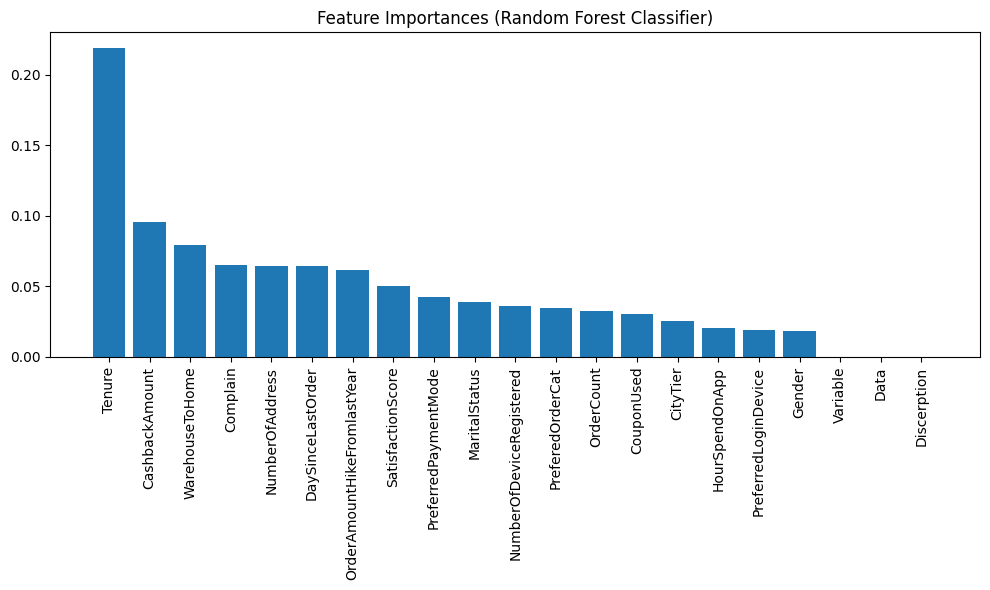

In [94]:
# Feature importance for Random Forest Classifier
rfc = models['Random Forest Classifier']
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Random Forest Classifier)')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

## Recommendations with Analysis

###  Target High-Value Customers

Focus on customers with high 'DaySinceLastOrder' and 'OrderAmountHikeFromLastYear'. These customers show potential for re-engagement and increased spending. By understanding their needs and preferences, tailored marketing efforts can convert them into loyal customers.

### Improve Complaint Handling

Address complaints promptly to improve satisfaction scores. Timely resolution of issues enhances customer trust and loyalty. Analyzing complaint trends can also identify areas for operational improvement, leading to a better overall customer experience.

### Offer Personalized Incentives

Offer personalized coupons and cashback to customers with high churn risk. Predictive analytics can identify at-risk customers, allowing for targeted retention strategies. Personalized offers can make these customers feel valued, reducing churn and increasing lifetime value.

###  Enhance User Experience

Enhance user experience on the preferred login device and preferred payment mode to increase retention. Analyzing user behavior can reveal insights into their preferences and pain points. By optimizing these touchpoints, customer satisfaction and retention rates can significantly improve.


# Customer Retention Strategies

## Personalized Recommendations
Providing personalized recommendations based on customer preferences can increase their loyalty. Build recommendation systems to suggest relevant products using data analytics, enhancing their shopping experience.

## Enhanced Mobile App Features
Many customers prefer using mobile phones over computers. Invest in improving the mobile app with personalized offers, easy navigation, and convenient checkout options to boost engagement and satisfaction.

## Coupon and Promotion Strategies
Promote the use of coupons with attractive discounts tied to specific order categories. Highlight savings and benefits to encourage customers to use coupons, as it correlates with higher order counts.

## Immediate Cashback and Rewards Programs
Customer churn is nearly 50% if tenure is one month or less. Offering higher cashback and bonus rewards in the initial days can reduce churn and increase customer retention.

## Customer Feedback Mechanisms
Establish effective feedback channels to gather customer input on their shopping experiences. Use NLP sentiment analysis to classify feedback and address issues related to item quality, price, service, and user experience.

## Engaging Features for Single Customers
Since 50% of churned customers are single, add engaging app features like spin and win, point systems, and daily rewards. These features can help keep single users active on the app.

## Tailored Initiatives for Married Customers
Nearly 50% of non-churned customers are married. Identify their specific needs and preferences through segmentation and tailored marketing initiatives to enhance retention.

## Importance of Recent Purchases
Recent purchasing activity is linked to lower churn rates. Use targeted re-engagement campaigns and timely follow-ups after purchases to maintain customer interest and prevent attrition.
